In [2]:
import pandas as pd

In [3]:
import pickle

In [4]:
import numpy as np
np.random.seed(2018)

In [5]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

In [6]:
url='https://drive.google.com/file/d/1XY8kQd7kEivHHmU3jdZAZD8s0Anb8XsP/view'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
trainingDf = pd.read_csv(url)
trainingDf.head()

,score,text,combine
0,3.0,"['good', 'helpfull', 'read', 'book', 'good', '...",good helpfull read book good type thats find d...
1,1.0,"['sadly', 'overprice', 'irrelevant', 'spite', ...",sadly overprice irrelevant spite claim illustr...
2,2.0,"['endless', 'rant', 'howard', 'borrow', 'denni...",endless rant howard borrow dennis miller start...
3,1.0,"['not', 'quite', 'hip', 'really', 'shame', 'ti...",not quite hip really shame time reserch go thi...
4,5.0,"['journey', 'centre', 'earth', 'hey', 'great',...",journey centre earth hey great book absolutely...


In [7]:
import gensim
from gensim import corpora
from pprint import pprint

In [8]:
def myprocess(thisdoc):
    ## Runs on documents (vector of words)
    return([text for text in thisdoc.split()])

In [9]:
docs=trainingDf['combine'].map(myprocess) 
docs[:10]

0    [good, helpfull, read, book, good, type, thats...
1    [sadly, overprice, irrelevant, spite, claim, i...
2    [endless, rant, howard, borrow, dennis, miller...
3    [not, quite, hip, really, shame, time, reserch...
4    [journey, centre, earth, hey, great, book, abs...
5    [long, land, free, repetitive, silly, prose, n...
6    [demon, viewamelia, atwaterrhodes, young, writ...
7    [heartbreakingbut, live, novel, compassionate,...
8    [wait, this, get, book, first, come, finally, ...
9    [awesome, book, absolutely, beautiful, daughte...
Name: combine, dtype: object

In [10]:
from gensim.models import Phrases
import gensim.models

In [11]:
print(docs[2])

['endless', 'rant', 'howard', 'borrow', 'dennis', 'miller', 'start', 'book', 'quoti', 'not', 'mean', 'rant', 'here', 'butquot', 'proceed', 'page', 'endless', 'whine', 'horrible', 'law', 'americathe', 'example', 'give', 'about', 'law', 'suffocating', 'america', 'sometimes', 'right', 'mark', 'time', 'not', 'well', 'define', 'less', 'would', 'more', 'idea', 'fix', 'dilemma', 'also', 'goodif', 'live', 'perfect', 'world', 'unfortunately', 'not', 'practical', 'solution', 'message', 'lose', 'amongst', 'myriad', 'word', 'woud', 'not', 'recommend', 'book', 'anyone', 'ted', 'kazinski']


In [12]:
from sklearn.model_selection import train_test_split
x_train,x_validate = train_test_split(docs,test_size=0.25)


In [15]:
len(x_train)

37500

In [16]:
len(x_validate)

12500

In [17]:
docs = x_train

In [18]:
dict_LoS = corpora.Dictionary(docs)

In [19]:
dict_LoS.filter_extremes(no_below=5, no_above=0.5)

In [20]:
print(dict_LoS)

Dictionary(21635 unique tokens: ['atlas', 'contact', 'get', 'lose', 'really']...)


In [21]:
try:
    print("Reading corpus from pickle")
    bow_corpus=pickle.load(open('bow_corpus.pkl', 'rb'))
except FileNotFoundError:
    print("Creating corpus and saving to pickle")
    bow_corpus = [dict_LoS.doc2bow(w) for w in docs]
    pickle.dump(bow_corpus, open('bow_corpus.pkl', 'wb'))
    pickle.dump(dict_LoS, open('dictionary.pkl', 'wb'))


Reading corpus from pickle


In [22]:
bow_doc_16 = bow_corpus[1000]

for i in range(len(bow_doc_16)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_16[i][0], 
                                               dict_LoS[bow_doc_16[i][0]], 
                                                bow_doc_16[i][1]))

Word 15 ("good") appears 1 time.
Word 39 ("least") appears 1 time.
Word 66 ("great") appears 2 time.
Word 87 ("new") appears 1 time.
Word 91 ("want") appears 1 time.
Word 118 ("force") appears 1 time.
Word 161 ("protagonist") appears 1 time.
Word 185 ("turner") appears 1 time.
Word 201 ("fancy") appears 1 time.
Word 203 ("food") appears 1 time.
Word 255 ("history") appears 1 time.
Word 289 ("share") appears 1 time.
Word 314 ("can") appears 1 time.
Word 328 ("grant") appears 1 time.
Word 334 ("initially") appears 2 time.
Word 336 ("journey") appears 1 time.
Word 385 ("philosophy") appears 1 time.
Word 389 ("possibility") appears 2 time.
Word 439 ("solo") appears 1 time.
Word 441 ("una") appears 1 time.
Word 446 ("boy") appears 1 time.
Word 450 ("definetely") appears 1 time.
Word 535 ("her") appears 2 time.
Word 538 ("human") appears 1 time.
Word 572 ("truthful") appears 1 time.
Word 579 ("easily") appears 1 time.
Word 590 ("avoid") appears 1 time.
Word 757 ("george") appears 1 time.
Wor

In [23]:
# LDA model without considering bigrams
try:
    lda_model=pickle.load(open('lda_model.pkl', 'rb'))
    print("Reading lda_model from pickle")
except FileNotFoundError:
    print("Creating lda_model and saving to pickle")
    lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=15, id2word=dict_LoS, passes=2, workers=2)
    pickle.dump(lda_model,open('lda_model.pkl','wb'))
    

Reading lda_model from pickle


In [21]:
pyLDAvis.enable_notebook()
# feed the LDA model into the pyLDAvis instance
lda_viz = gensimvis.prepare(lda_model, bow_corpus, dict_LoS)

C:\Users\Team Knowhow\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
C:\Users\Team Knowhow\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [24]:
lda_model[bow_corpus[89]]

[(3, 0.37931657), (4, 0.35650757), (10, 0.2430914)]

In [25]:
lda_model.show_topics(20,7)

[(0,
  '0.021*"story" + 0.014*"novel" + 0.013*"character" + 0.008*"write" + 0.007*"reader" + 0.007*"classic" + 0.007*"one"'),
 (1,
  '0.012*"jane" + 0.010*"novel" + 0.008*"austen" + 0.008*"one" + 0.006*"character" + 0.005*"make" + 0.005*"love"'),
 (2,
  '0.018*"one" + 0.016*"like" + 0.015*"get" + 0.013*"good" + 0.012*"think" + 0.012*"would" + 0.012*"make"'),
 (3,
  '0.010*"life" + 0.007*"woman" + 0.007*"god" + 0.007*"one" + 0.006*"find" + 0.006*"way" + 0.006*"man"'),
 (4,
  '0.008*"write" + 0.007*"work" + 0.007*"one" + 0.005*"history" + 0.005*"would" + 0.005*"new" + 0.004*"reader"'),
 (5,
  '0.009*"one" + 0.008*"time" + 0.007*"war" + 0.006*"year" + 0.006*"write" + 0.006*"novel" + 0.006*"story"'),
 (6,
  '0.017*"novel" + 0.009*"one" + 0.007*"character" + 0.007*"story" + 0.006*"life" + 0.005*"world" + 0.005*"george"'),
 (7,
  '0.012*"life" + 0.008*"time" + 0.007*"write" + 0.007*"one" + 0.006*"well" + 0.006*"game" + 0.006*"take"'),
 (8,
  '0.007*"like" + 0.007*"story" + 0.007*"make" + 0.0

In [26]:
try:
    lda_display=pickle.load(open('lda_display.pkl', 'rb'))
    print("Reading lda_display from pickle")
except FileNotFoundError:
    print("Creating lda_display and saving to pickle")
    lda_display = gensimvis.prepare(lda_model, bow_corpus, 
                                          dict_LoS, mds='mmds')
    pickle.dump(lda_display,open('lda_display.pkl','wb'))

Reading lda_display from pickle


## LDA MODEL WITHOUT BIGRAMS

In [25]:
pyLDAvis.display(lda_display, template_type='notebook')

# Coherence and Perplexity of Initial Model


Types of coherence metrics

* C_v measure is based on a sliding window, one-set segmentation of the top words and an indirect confirmation measure that uses normalized pointwise mutual information (NPMI) and the cosine similarity
* C_p is based on a sliding window, one-preceding segmentation of the top words and the confirmation measure of Fitelson’s coherence
* C_uci measure is based on a sliding window and the pointwise mutual information (PMI) of all word pairs of the given top words
* C_umass is based on document cooccurrence counts, a one-preceding segmentation and a logarithmic conditional probability as confirmation measure
* C_npmi is an enhanced version of the C_uci coherence using the normalized pointwise mutual information (NPMI)
* C_a is baseed on a context window, a pairwise comparison of the top words and an indirect confirmation measure that uses normalized pointwise mutual information (NPMI) and the cosine similarity
Fastest method - ‘u_mass’, ‘c_uci’. For ‘u_mass’ corpus should be provided, if texts is provided, it will be converted to corpus using the dictionary. For ‘c_v’, ‘c_uci’ and ‘c_npmi’ texts should be provided (corpus isn’t needed)


In [27]:
from gensim.models import CoherenceModel

In [28]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=docs, dictionary=dict_LoS, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()

In [29]:
# for no bigram model, coherence = 0.31
print('Coherence Score: ', coherence_lda)


Coherence Score:  0.3576489990630081


In [30]:
# Compute perplexity score on the whole corpus
print('\nPerplexity: ', lda_model.log_perplexity(bow_corpus))


Perplexity:  -8.184300236165196


## Hyperparameter tuning


https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0#:~:text=But%20before%20that%E2%80%A6-,What%20is%20topic%20coherence%3F,are%20artifacts%20of%20statistical%20inference.

Now we have established a baseline coherence for our model, we can adjust the hyperparameters to try and optimise the perplexity score.

The key hyperparameters for our LDA model are:

* Number of Topics (K)
* Dirichlet hyperparameter alpha: Document-Topic Density
* Dirichlet hyperparameter beta: Word-Topic Density

Number of topics
Determining the number of topics for an LDA topic modelling alogirthm is important as too few topics may not capture the relationships well between the words, whereas too many topics may produce 'rubbish'. This is similar to under and overfitting respectively.


Aside from the number of topics, the most important parameters are the Bayesian prior hyperparameters alpha and beta (labelled ‘eta’ in Gensim). Both hyperparameters represent our prior beliefs about the corpus before we train our model.

* Alpha - Larger the value of alpha, documents are composed of more topics and lower the value of alpha, documents contain fewer topics.

* Beta - Larger the beta, topics are composed of a large number of words in the corpus, and with the lower value of beta, they are composed of few words.

To determine the number topics, we shall use the elbow method with perplexity score as its cost function.



In [34]:
import math
# this is our supporting function
def compute_perplexity_values(k):
    
    lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=k, id2word=dict_LoS, passes=1, workers=2)
    
    perplexity_model_lda = math.exp(lda_model.log_perplexity(x_validate))
    
    return perplexity_model_lda

Grid search carried out on just the model which was has a corpus with no bigrams.

In [35]:
import tqdm

In [36]:
min_topics=4
max_topics=5
step =1

topics_range = range(min_topics, max_topics, step)

model_results = {'Topics': [],
                 'Perplexity': []
                }

pbar = tqdm.tqdm(total=(len(topics_range)))
for k in topics_range:
    cp = compute_perplexity_values(k=k)
    model_results['Topics'].append(k)
    model_results['Perplexity'].append(cp)
    print(k)
    pbar.update(1)
pbar.close()
    
    
    


  0%|                                                                                            | 0/1 [13:55<?, ?it/s]


KeyboardInterrupt: 

In [39]:
dframe = pd.DataFrame(model_results)

In [40]:
dframe

,Topics,Perplexity
0,4,0.000329
1,5,0.000327


<AxesSubplot:xlabel='Topics'>

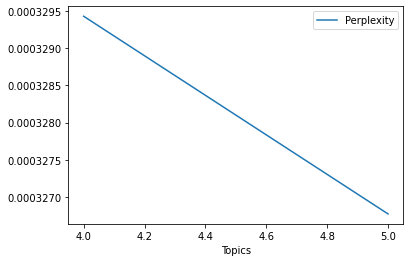

In [42]:
dframe.plot(x ='Topics', y='Perplexity', kind='line')

In [43]:
dframe.to_csv('perplexity_scores.csv', index=False)